<a href="https://colab.research.google.com/github/Rodrigu87/Module-2-Project-CAS-UniBe/blob/main/Divorce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **MODULE 2 PROJECT**

# The divorce code
*By Kabir, Rodrigue and Sertac*



**Research objectives**

This project aims to advance our understanding of the factors that contribute to divorce.

Specifically, it seeks to:


*   Predict the likelihood of divorce
*  Identify the decisive factors leading to divorce






### Research questions

*   To what extent can demographic, socioeconomic, relational,and psychosocial variables predict the likelihood of divorce among married couples?
*   Which factors are the strongest determinants of divorce in this population?



# **Research hypotheses**

*  H1: Couples who marry at a younger age are significantly more likely to divorce than those who marry later, regardless of income and education.

*   H2: Pre-marital cohabitation increases the risk of divorce in love marriages, but decreases the risk in arranged marriages.


In [1]:
# About the dataset
# synthetic dataset from kaggle.com (https://www.kaggle.com/datasets/vanpatangan/divorce-prediction/data)


In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/Rodrigu87/Module-2-Project-CAS-UniBe/main/divorce_df.csv"
df = pd.read_csv(url)
df.head(10)

,age_at_marriage,marriage_duration_years,num_children,education_level,employment_status,combined_income,religious_compatibility,cultural_background_match,communication_score,conflict_frequency,...,mental_health_issues,infidelity_occurred,counseling_attended,social_support,shared_hobbies_count,marriage_type,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced
0,30,1,1,Bachelor,Full-time,64001,Different Religion,1,5.536016,3,...,0,0,0,8.428183,5,Love,1,0,6.262411,1
1,27,2,2,Master,Full-time,86221,Same Religion,1,5.810172,3,...,0,1,0,5.297221,1,Love,1,0,6.769384,1
2,31,6,0,High School,Part-time,69441,Same Religion,0,6.088146,3,...,0,0,0,5.887066,1,Arranged,1,0,5.532866,1
3,35,3,2,Bachelor,Full-time,69513,Not Religious,1,6.212046,3,...,0,0,0,5.263555,5,Love,1,0,3.491264,0
4,26,2,2,No Formal Education,Full-time,63986,Different Religion,1,4.826262,1,...,0,0,1,5.771259,4,Love,1,0,10.000000,1
5,26,10,0,High School,Full-time,44605,Same Religion,0,6.825964,3,...,0,0,0,6.909350,3,Love,1,0,4.628149,0
6,35,10,2,High School,Full-time,73454,Different Religion,1,3.775491,1,...,0,0,0,7.351375,1,Love,1,0,5.753932,0
7,31,17,1,High School,Unemployed,59491,Not Religious,1,6.613021,4,...,0,0,0,8.709813,2,Love,0,0,7.010559,1
8,25,5,1,Bachelor,Full-time,40944,Not Religious,0,2.963345,0,...,0,0,0,8.727489,3,Arranged,1,0,2.428385,0
9,30,1,0,PhD,Full-time,46819,Same Religion,1,3.612109,1,...,1,0,0,5.939285,1,Arranged,1,0,8.750676,1


# Part A. Descriptive statistics on divorces and non-divorced coupes



# Part B. inferential statistics
Compare divorced vs non-divorced couples on social_support



In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


===== social_support =====
Shapiro test: p0=0.000, p1=0.000


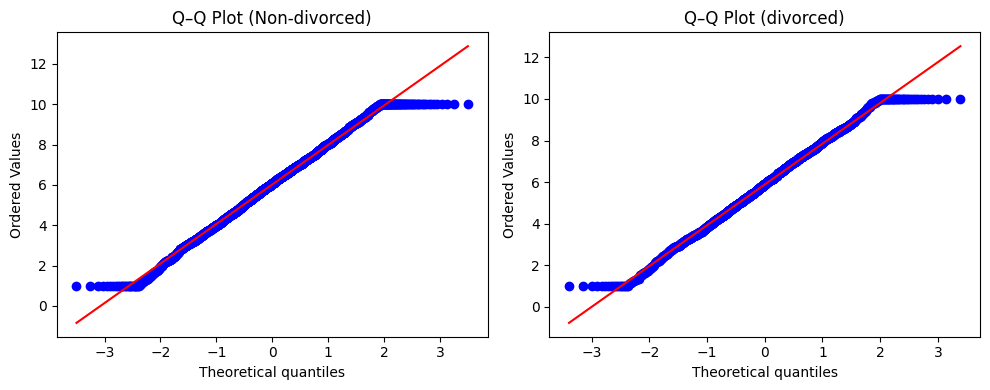

Levene’s test (equal var?): p=0.686


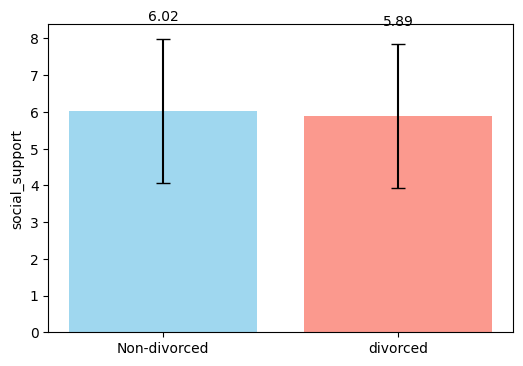

Mann–Whitney U statistic = 3113948.500
p-value = 0.0177


In [8]:
# Variables of interest
group_col = "divorced"
vars_to_test = ["social_support"]

# Hypotheses
#H0 = There is no significant difference in social support between divorced and non-divorced couples
#H1 = Divorced couples and non-divorced couples differ significantly in their level of social support.


# Function to run tests
def compare_groups(df, var, group_col="divorced"):
    print(f"\n===== {var} =====")

    # Split groups
    Non_divorced = df.loc[df[group_col] == 0, var].dropna()
    Divorced = df.loc[df[group_col] == 1, var].dropna()

    # Check normality (Shapiro-Wilk)
    sw_Non_divorced = stats.shapiro(Non_divorced)
    sw_Divorced = stats.shapiro(Divorced)
    print(f"Shapiro test: p0={sw_Non_divorced.pvalue:.3f}, p1={sw_Divorced.pvalue:.3f}")

    # Side-by-side QQ plots
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    stats.probplot(Non_divorced, dist="norm", plot=axes[0])
    axes[0].set_title(f"Q–Q Plot (Non-{group_col})")

    stats.probplot(Divorced, dist="norm", plot=axes[1])
    axes[1].set_title(f"Q–Q Plot ({group_col})")

    plt.tight_layout()
    plt.show()

    # Check equal variances (Levene’s test)
    lev = stats.levene(Non_divorced, Divorced)
    print(f"Levene’s test (equal var?): p={lev.pvalue:.3f}")

    #Barplots
    # 1. Compute group means and stds
    means = [np.mean(Non_divorced), np.mean(Divorced)]
    stds  = [np.std(Non_divorced), np.std(Divorced)]

    # 2. Labels
    groups = [f"Non-{group_col}", group_col]

    # 3. Plot
    fig, ax = plt.subplots(figsize=(6,4))
    ax.bar(groups, means, yerr=stds, capsize=5, color=["skyblue","salmon"], alpha=0.8)

    # 4. Labels & title
    ax.set_ylabel(var)

    # 5. Optional: show mean values on top of bars
    for i, v in enumerate(means):
        ax.text(i, v + stds[i] + 0.5, f"{v:.2f}", ha='center', fontsize=10)

    plt.show()

    #Mann Mann–Whitney U Test
    u_stat, p_val = stats.mannwhitneyu(
        Non_divorced, Divorced,
        alternative='two-sided'   # can be 'two-sided', 'less', or 'greater'
    )

    print(f"Mann–Whitney U statistic = {u_stat:.3f}")
    print(f"p-value = {p_val:.4f}")


# Run tests for each variable
for var in vars_to_test:
    compare_groups(df, var, group_col)

In [7]:
# Check normality (Shapiro-Wilk)
sw_Non_divorced = stats.shapiro(Non_divorced)
sw_Divorced = stats.shapiro(Divorced)
print(f"Shapiro test: p0={sw_Non_divorced.pvalue:.3f}, p1={sw_Divorced.pvalue:.3f}")

# Side-by-side QQ plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

stats.probplot(Non_divorced, dist="norm", plot=axes[0])
axes[0].set_title("Q–Q Plot (Non-divorced)")

stats.probplot(Divorced, dist="norm", plot=axes[1])
axes[1].set_title("Q–Q Plot (Divorced)")

plt.tight_layout()
plt.show()


NameError: name 'Non_divorced' is not defined

In [ ]:
# Check equal variances (Levene’s test)
lev = stats.levene(Non_divorced, Divorced)
print(f"Levene’s test (equal var?): p={lev.pvalue:.3f}")

#Barplots
# 1. Compute group means and stds
means = [np.mean(Non_divorced), np.mean(Divorced)]
stds  = [np.std(Non_divorced), np.std(Divorced)]

# 2. Labels
groups = ["Non-divorced", "Divorced"]

# 3. Plot
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(groups, means, yerr=stds, capsize=5, color=["skyblue","salmon"], alpha=0.8)

# 4. Labels & title
ax.set_ylabel("Social support")

# 5. Optional: show mean values on top of bars
for i, v in enumerate(means):
    ax.text(i, v + stds[i] + 0.5, f"{v:.2f}", ha='center', fontsize=10)

plt.show()

In [ ]:
#Mann Mann–Whitney U Test
u_stat, p_val = stats.mannwhitneyu(
    Non_divorced, Divorced,
    alternative='two-sided'   # can be 'two-sided', 'less', or 'greater'
)

print(f"Mann–Whitney U statistic = {u_stat:.3f}")
print(f"p-value = {p_val:.4f}")

In [ ]:
# 2a. Hypothesis test
#H1: Couples who marry at a younger age are significantly more likely to divorce than those who marry later, regardless of income and education.

# ================================
# H1 TEST: Younger age → ↑ divorce (controlling income & education)
# ================================
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score

# ---- Utility to compute Odds Ratio + CI for a variable
def or_ci_from_result(result, var):
    beta = result.params[var]
    lo, hi = result.conf_int().loc[var]
    return np.exp(beta), np.exp(lo), np.exp(hi), result.pvalues[var]


print("Shape:", df.shape)
print("Target distribution:", df["divorced"].value_counts(normalize=True).round(3).to_dict())

# Keep only what we need for H1
dat = df[["divorced", "age_at_marriage", "combined_income", "education_level"]].dropna().copy()
dat["divorced"] = dat["divorced"].astype(int)
dat["age_at_marriage"] = dat["age_at_marriage"].astype(float)
dat["log_income"] = np.log1p(dat["combined_income"].astype(float))  # robust to skew/zeros
print("Education levels:", sorted(dat["education_level"].unique().tolist()))

# STEP 2 — Assumption check: Linearity of the logit (Box–Tidwell) for age & income
# If the interaction terms are significant (p<0.05), consider non-linear terms for that predictor.
dat["age_log_age"] = dat["age_at_marriage"] * np.log(dat["age_at_marriage"])
dat["log_income_log_log_income"] = dat["log_income"] * np.log(dat["log_income"] + 1e-9)

bt_model = smf.logit(
    "divorced ~ age_at_marriage + age_log_age + log_income + log_income_log_log_income + C(education_level)",
    data=dat
).fit(disp=False)

print("\n[Box–Tidwell terms]")
print(bt_model.summary().tables[1])
print("Interpretation: p<0.05 on 'age_log_age' or 'log_income_log_log_income' suggests nonlinearity.")

# STEP 3 — Main logistic regression (controls: income + education)
# This tests H1 directly with covariate adjustment.
main_model = smf.logit(
    "divorced ~ age_at_marriage + log_income + C(education_level)",
    data=dat
).fit(disp=False)

print("\n[Main logistic regression]")
print(main_model.summary())

# STEP 4 — Hypothesis readout: Odds Ratio & AME for age_at_marriage
or_age, lo_age, hi_age, p_age = or_ci_from_result(main_model, "age_at_marriage")
print(f"\nAge at marriage — OR: {or_age:.3f} (95% CI {lo_age:.3f}–{hi_age:.3f}), p={p_age:.4g}")
print("Interpretation: OR < 1 supports 'younger age → higher divorce odds' (controlling for income & education).")

marg = main_model.get_margeff(at='overall', method='dydx')
print("\n[Average marginal effects]")
print(marg.summary())  # dydx for each predictor; look for age_at_marriage

# STEP 5 — Multicollinearity (VIF) on the design used
X = pd.get_dummies(dat[["age_at_marriage", "log_income", "education_level"]], drop_first=True)
X = add_constant(X)
vif = pd.DataFrame({
    "feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
}).sort_values("VIF", ascending=False)
print("\n[VIF table] (VIF>5–10 may be concerning)")
print(vif.to_string(index=False))

# STEP 6 — Discrimination (AUC; in-sample is fine for hypothesis testing)
pred_prob = main_model.predict()
auc = roc_auc_score(dat["divorced"], pred_prob)
print(f"\nIn-sample AUC: {auc:.3f}")

In [ ]:
# 2b. Hypothesis test
#H2: Pre-marital cohabitation increases the risk of divorce in love marriages, but decreases the risk in arranged marriages.
# H2 TEST: "Pre-marital cohabitation increases divorce risk in LOVE marriages,
#          but decreases it in ARRANGED marriages."

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score

# -----------------------------
# STEP 1 — Load & minimal inspect
# -----------------------------
print("Shape:", df.shape)
print("Marriage types:", df["marriage_type"].value_counts().to_dict())
print("Premarital cohabitation:", df["pre_marital_cohabitation"].value_counts().to_dict())
print("Target distribution (divorced):", df["divorced"].value_counts(normalize=True).round(3).to_dict())

# -----------------------------
# STEP 2 — Keep variables & clean
# -----------------------------
cols = [
    "divorced", "pre_marital_cohabitation", "marriage_type",
    "age_at_marriage", "combined_income", "education_level"
]
dat = df[cols].dropna().copy()
dat["divorced"] = dat["divorced"].astype(int)
dat["pre_marital_cohabitation"] = dat["pre_marital_cohabitation"].astype(int)
dat["age_at_marriage"] = dat["age_at_marriage"].astype(float)
dat["log_income"] = np.log1p(dat["combined_income"].astype(float))  # control for skew

# -----------------------------
# STEP 3 — Logit with interaction (Arranged as reference)
# -----------------------------
formula = (
    "divorced ~ pre_marital_cohabitation "
    "* C(marriage_type, Treatment(reference='Arranged')) "
    "+ age_at_marriage + log_income + C(education_level)"
)
model = smf.logit(formula, data=dat).fit(disp=False)
print("\n[Logit: cohab × marriage_type + controls]")
print(model.summary())

# -----------------------------
# STEP 4 — Simple effects of cohab within each marriage type
# Arranged: beta = coef(cohab)
# Love:     beta = coef(cohab) + coef(cohab:Love)
# (Convert to OR with 95% CI)
# -----------------------------
params = model.params
cov = model.cov_params()
names = params.index.tolist()

def or_ci_for_linear_combo(L, params, cov, z=1.96):
    est = float(np.dot(L, params))
    se = float(np.sqrt(np.dot(L, np.dot(cov, L))))
    lo, hi = est - z*se, est + z*se
    return np.exp(est), np.exp(lo), np.exp(hi), est, se

# Main effect (Arranged baseline)
idx_cohab = names.index("pre_marital_cohabitation")
L_arranged = np.zeros(len(names)); L_arranged[idx_cohab] = 1.0
orA, loA, hiA, estA, seA = or_ci_for_linear_combo(L_arranged, params.values, cov.values)
print("\n[Simple effect of premarital cohabitation]")
print(f"ARRANGED — beta={estA:.3f} (SE={seA:.3f}); OR={orA:.3f} (95% CI {loA:.3f}–{hiA:.3f})")

# Love interaction term name (as created by the formula)
int_name_love = "pre_marital_cohabitation:C(marriage_type, Treatment(reference='Arranged'))[T.Love]"
if int_name_love in names:
    L_love = np.zeros(len(names))
    L_love[idx_cohab] = 1.0
    L_love[names.index(int_name_love)] = 1.0
    orL, loL, hiL, estL, seL = or_ci_for_linear_combo(L_love, params.values, cov.values)
    print(f"LOVE     — beta={estL:.3f} (SE={seL:.3f}); OR={orL:.3f} (95% CI {loL:.3f}–{hiL:.3f})")
else:
    print("LOVE     — interaction term not found; check categories in 'marriage_type'.")

# -----------------------------
# STEP 5 — Test the interaction (is effect different in Love vs Arranged?)
# -----------------------------
if int_name_love in names:
    w = model.wald_test(np.eye(len(names))[names.index(int_name_love)])
    print("\n[Wald test for interaction (Love vs Arranged)]")
    print(w)

# -----------------------------
# STEP 6 — Multicollinearity (VIF) on the design matrix
# -----------------------------
y, X = model.model.endog, model.model.exog
vif = pd.DataFrame({
    "feature": names,
    "VIF": [variance_inflation_factor(X, i) for i in range(X.shape[1])]
}).sort_values("VIF", ascending=False)
print("\n[VIF table]")
print(vif.to_string(index=False))

# -----------------------------
# STEP 7 — Predicted probabilities for a typical case
# -----------------------------
modal_edu = dat["education_level"].mode().iat[0]
mean_age = dat["age_at_marriage"].mean()
mean_log_inc = dat["log_income"].mean()

def pred_prob(marriage_type, cohab):
    d = {
        "pre_marital_cohabitation": [cohab],
        "marriage_type": [marriage_type],
        "age_at_marriage": [mean_age],
        "log_income": [mean_log_inc],
        "education_level": [modal_edu],
    }
    return float(model.predict(pd.DataFrame(d)).values[0])

for mt in ["Arranged", "Love"]:
    if mt in dat["marriage_type"].unique():
        p0, p1 = pred_prob(mt, 0), pred_prob(mt, 1)
        print(f"\nPredicted P(divorce) — {mt}:")
        print(f"  Cohab=0 → {p0:.3f}")
        print(f"  Cohab=1 → {p1:.3f}   Δ={p1 - p0:+.3f}")

# -----------------------------
# STEP 8 — Model discrimination (AUC, in-sample for context)
# -----------------------------
pred = model.predict()
auc = roc_auc_score(dat["divorced"], pred)
print(f"\nAUC (in-sample): {auc:.3f}")
